In [1]:
#Scikit-Learn provides many helper functions to download popular datasets
#MNIST is one of them 
from sklearn.datasets import fetch_openml

In [2]:
#Download data from mnist version 1

mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist['data'],mnist['target']

In [9]:
X.shape


(70000, 784)

In [5]:
y.shape

(70000,)

In [20]:
X[0].shape

(784,)

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [12]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)


In [12]:
some_digit_image.shape

(28, 28)

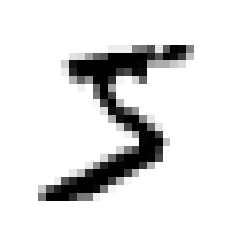

In [13]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [17]:
y = y.astype(np.uint8)

In [18]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [21]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 5 LOCATOR/IDENTIFIER

In [26]:
y_train_5 = (y_train==5)# True for all 5s, False for all other digits.
y_test_5 = (y_test ==5)

In [27]:
#Lets train this using 
#a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class


from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

### 5 is present in X[0] index , Lets predict this digit is 5 or not

In [28]:
sgd_clf.predict([X[0]])
#or
sgd_clf.predict([some_digit])

array([ True])

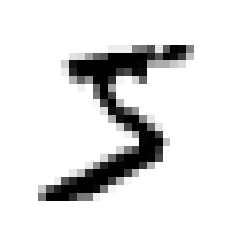

In [29]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

### Implementing Cross-Validation

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


In [36]:
print("Working")

Working


In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_5[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_5[test_index]
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred)) 

/home/mahin/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.95035
0.96035
0.9604
